# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [44]:
#importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

In [3]:
# revisar columnas plans 
plans.head(5)

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [4]:
# revisar columnas users
users.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [5]:
# revisar columnas usage
usage.head(5)

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [6]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [7]:
# inspección de plans con .info()
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [8]:
# inspección de users con .info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [9]:
# inspección de usage con .info()
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [10]:
# cantidad de nulos para users
print(users.isna().sum())# Cantidad de valores nulos)
print(users.isna().mean())# Proporción de valores nulos)

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [11]:
# cantidad de nulos para usage
print(usage.isna().sum())
print(usage.isna().mean())

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint: 
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 

**Para el dataset de Users, tendremos que revisar mas a fondo la columna "city", ya que tiene un 11% de los datos incompletos o diferentes.
Para la misma tabla, con la columna "Churn_date", tendremos que eliminarla e ignorar sus datos, ya que tienen una variabilidad del 88% que puede afectar los resultados futuros.**

**Dentro del dataset Usage, mi recomendación es imputar los nulos de la columna "date", ya que solo conlleva el .12% de nulidad.
Investigar más a fondo e imputar si es necesario las columnas de "duration" y de "length" ya que presentan una nulidad de datos en un 55% y 44% respectivamente.**

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [12]:
# explorar columnas numéricas de users
print(users.describe())

            user_id          age
count   4000.000000  4000.000000
mean   11999.500000    33.739750
std     1154.844867   123.232257
min    10000.000000  -999.000000
25%    10999.750000    32.000000
50%    11999.500000    47.000000
75%    12999.250000    63.000000
max    13999.000000    79.000000


- La columna `user_id` comienza en el 10000 y termina en el 13999 teniendo la cantidad correcta de usuarios. En este caso la desviación estándar no afecta ya que es el numero asignado a un usuario.
- La columna `age` por otro lado tiene como valor mínimo de -999 lo cual debe ser un fallo en datos a explorar. Asimismo, tiene una desviación un poco alta que si puede concentrar los datos en cierto sector.

In [13]:
# explorar columnas numéricas de usage
print(usage.describe())

                id       user_id      duration        length
count  40000.00000  40000.000000  17924.000000  22104.000000
mean   20000.50000  12002.405975      5.202237     52.127398
std    11547.14972   1157.279564      6.842701     56.611183
min        1.00000  10000.000000      0.000000      0.000000
25%    10000.75000  10996.000000      1.437500     37.000000
50%    20000.50000  12013.000000      3.500000     50.000000
75%    30000.25000  13005.000000      6.990000     64.000000
max    40000.00000  13999.000000    120.000000   1490.000000


- Las columnas `id` y `user_id` tienen la misma cantidad de datos, la desviación similar con una variabilidad alta, la misma distancia entre el mínimo y el máximo; sin embargo para el tipo de dato, esta información solo constata que tenemos la cantidad correcta de información.
- Las columnas `duration` y `length` tienen distintas medidas, la desviación de 6 contra 56 respectivamente, aunque sean ambas pequeñas en variabilidad, ambas van desde el 0 como mínimo con una máxima de 120 contra 1490 respectivamente.

In [14]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
users[columnas_user].describe()

,city,plan
count,3531,4000
unique,7,2
top,Bogotá,Basico
freq,808,2595


- La columna `city` tiene 469 filas sin información, tenemos 7 ciudades únicas, la que más se repite es Bogotá con una frecuencia de 808 sobre 40000 filas.
- La columna `plan` que contiene todas las filas completas, con dos tipos de plan, el más frecuente es Básico con 2595 veces en el dataset.

In [15]:
# explorar columna categórica de usage
usage_type = ['type'] 
usage[usage_type].describe()

,type
count,40000
unique,2
top,text
freq,22092


- La columna `type` contiene las 40000 filas con información, con dos variaciones de información, teniendo a "text" como el principal con una frecuencia de 22092.

---
✍️ **Comentario**: Con un faltante de 11.7% en ciudad y la baja cardinalidad (solo 7 ciudades) es una ventaja operativa porque hace que todo sea más inspeccionable y manejable. Asimismo, el resto de columnas revisadas estan completas y manejables.

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?  En Ciudad
- ¿Qué acción tomarías?  Revisar si es un fallo de sistema y predecir la ciudad faltante dada la baja cardinalidad.

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [16]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')

In [17]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'], errors='coerce')

In [18]:
# Revisar los años presentes en `reg_date` de users
users['reg_date'].dt.year.value_counts().sort_index()

2022    1314
2023    1316
2024    1330
2026      40
Name: reg_date, dtype: int64

En `reg_date`, la gran mayoría de los datos van del año 2022 al 2024, sin embargo no tenemos datos para el 2025 y pocos en 2026.

In [19]:
# Revisar los años presentes en `date` de usage
usage['date'].dt.year.value_counts().sort_index()

2024.0    39950
Name: date, dtype: int64

En `date`, el único año disponible es 2024, sin embargo nos faltan 50 filas con la información de la fecha.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Para el dataset users**: 40 registros representan apenas el 1% del dataset, probablemente un error de captura (ej. 2026 en lugar de 2023 o 2024). 

**Para el dataset usage**: tenemos 50 registros faltantes de año, como el dataset solo cuenta con el año 2024, podriamos asumir que todos los registros son de esa misma fecha.

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos) Claro, en el dataset users, tenemos registros para el año 2026 que aún no transcurría al crear el dataset.
- ¿Qué harías con ellas? Como no podemos asumir el año correcto, lo más honesto es dejarlos como NaT en lugar de imputar un valor que podría ser incorrecto.

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [20]:

# Reemplazar -999 por la mediana de age
age_mediana = users.loc[users['age'] != -999, 'age'].median()
users['age'] = users['age'].replace(-999, age_mediana)

# Verificar cambios
users['age'].describe()


count    4000.000000
mean       48.136000
std        17.689919
min        18.000000
25%        33.000000
50%        48.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [21]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace('?', pd.NA)
# Verificar cambios
users['city'].describe()

count       3435
unique         6
top       Bogotá
freq         808
Name: city, dtype: object

In [22]:
# Marcar fechas futuras como NA para reg_date
users.loc[users['reg_date'].dt.year == 2026, 'reg_date'] = pd.NaT
# Verificar cambios
users['reg_date'].describe()

count                              3960
unique                             3960
top       2024-06-27 06:08:22.325581392
freq                                  1
first               2022-01-01 00:00:00
last                2024-12-31 00:00:00
Name: reg_date, dtype: object

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [23]:
# Verificación MAR en usage (Missing At Random) para duration
print(usage.groupby('type')['duration'].apply(lambda x: x.isnull().sum()))

type
call        0
text    22076
Name: duration, dtype: int64


In [24]:
# Verificación MAR en usage (Missing At Random) para length
print(usage.groupby('type')['length'].apply(lambda x: x.isnull().sum()))

type
call    17896
text        0
Name: length, dtype: int64


**DIAGNÓSTICO MAR - duration y length**

duration: 22,076 nulos concentrados exclusivamente en type='text'
        → Los SMS no tienen duración en segundos, es un campo no aplicable

length: 17,896 nulos concentrados exclusivamente en type='call'
        → Las llamadas no tienen longitud en bytes, es un campo no aplicable

Conclusión: MAR confirmado → los nulos dependen estructuralmente de 'type'

Acción: mantener como NaN, imputar sería introducir datos sin sentido de negocio

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:** 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [25]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int)  # conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int)  # conocer el total de llamadas

# Agrupar información por usuario
usage_agg = usage.groupby("user_id").agg(
    cant_mensajes        = ("is_text", "sum"),
    cant_llamadas        = ("is_call", "sum"),
    cant_minutos_llamada = ("duration", "sum")
).reset_index()

# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [26]:
# Renombrar columnas
usage_agg.columns = ["user_id", "cant_mensajes", "cant_llamadas", "cant_minutos_llamada"]

# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [27]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = users.merge(usage_agg, on="user_id", how="left")
user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [28]:
# Resumen estadístico de las columnas numéricas
user_profile[["age", "cant_mensajes", "cant_llamadas", "cant_minutos_llamada"]].describe().round(2)

,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.00,3999.00,3999.00,3999.00
mean,48.14,5.52,4.48,23.32
std,17.69,2.36,2.14,18.17
min,18.00,0.00,0.00,0.00
25%,33.00,4.00,3.00,11.12
50%,48.00,5.00,4.00,19.78
75%,63.00,7.00,6.00,31.42
max,79.00,17.00,15.00,155.69


In [29]:
# Distribución porcentual del tipo de plan
user_profile["plan"].value_counts(normalize=True).mul(100).round(2)

Basico     64.88
Premium    35.12
Name: plan, dtype: float64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

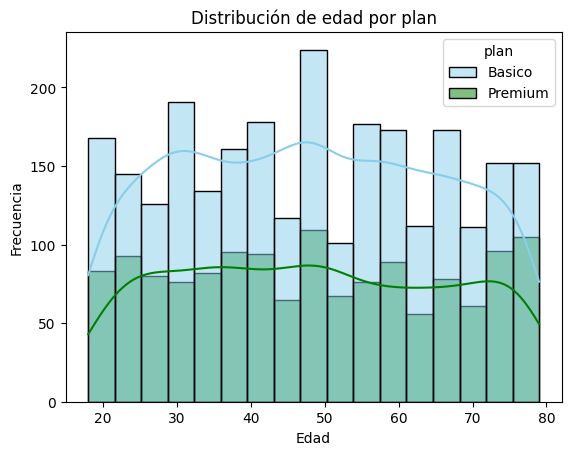

In [30]:
# Histograma para visualizar la edad (age)
sns.histplot(data=user_profile, x="age", hue="plan", palette=["skyblue", "green"], kde=True)
plt.title("Distribución de edad por plan")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

💡Insights: 
- Distribución simétrica con ciertos puntos sobre la edad de 50 años, los planes premium se mantienen en frecuencia alrededor de 100 bastante estables alrededor del 40% por edad.

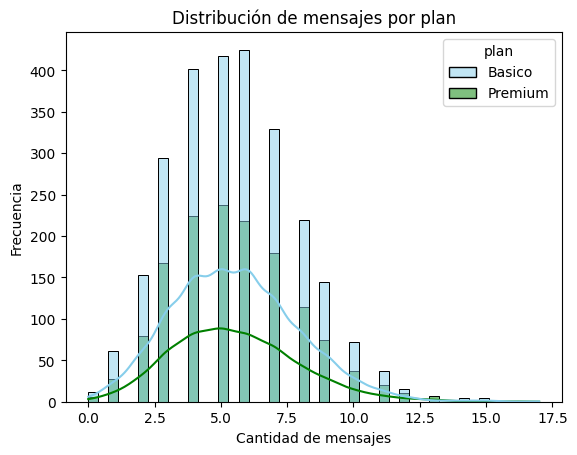

In [31]:
# Histograma para visualizar la cant_mensajes
sns.histplot(data=user_profile, x="cant_mensajes", hue="plan", palette=["skyblue", "green"], kde=True)
plt.title("Distribución de mensajes por plan")
plt.xlabel("Cantidad de mensajes")
plt.ylabel("Frecuencia")
plt.show()

💡Insights: 
- Distribución con sesgo a la derecha yendo de 0 a 15 mensajes con un pico en 6 mensajes por usuario, los planes se mantienen alrededor del 50% premium 50% básico.

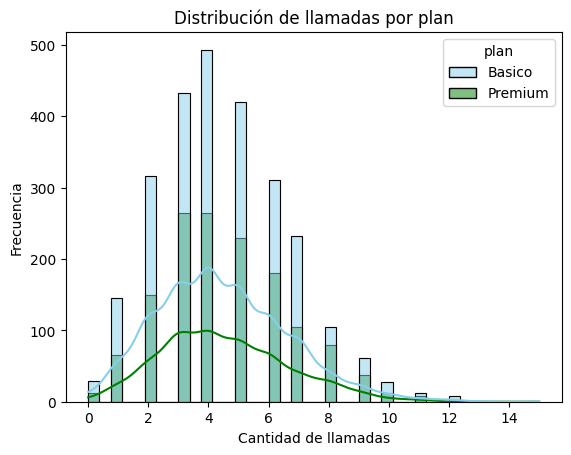

In [32]:
# Histograma para visualizar la cant_llamadas
sns.histplot(data=user_profile, x="cant_llamadas", hue="plan", palette=["skyblue", "green"], kde=True)
plt.title("Distribución de llamadas por plan")
plt.xlabel("Cantidad de llamadas")
plt.ylabel("Frecuencia")
plt.show()

💡Insights: 
- Distribución sesgada a la derecha, con una máxima de cantidad 14 por usuario sobretodo en paquete premium, con un pico en 4 llamadas sobretodo con clientes en paquete premium.

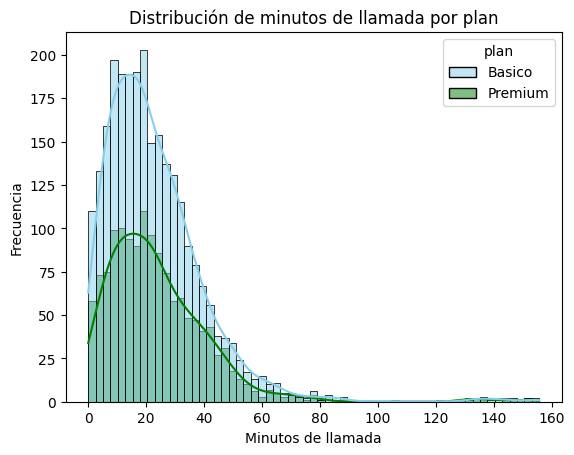

In [33]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(data=user_profile, x="cant_minutos_llamada", hue="plan", palette=["skyblue", "green"], kde=True)
plt.title("Distribución de minutos de llamada por plan")
plt.xlabel("Minutos de llamada")
plt.ylabel("Frecuencia")
plt.show()

💡Insights: 
- La distribución mantiene un gran sesgo a la derecha con un máximo de 160 minutos, teniendo la mayoria de los datos concentrados entre 20 minutos, con un visual de 40% premium y 60% básico.

### 5.2 Identificación de Outliers


🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

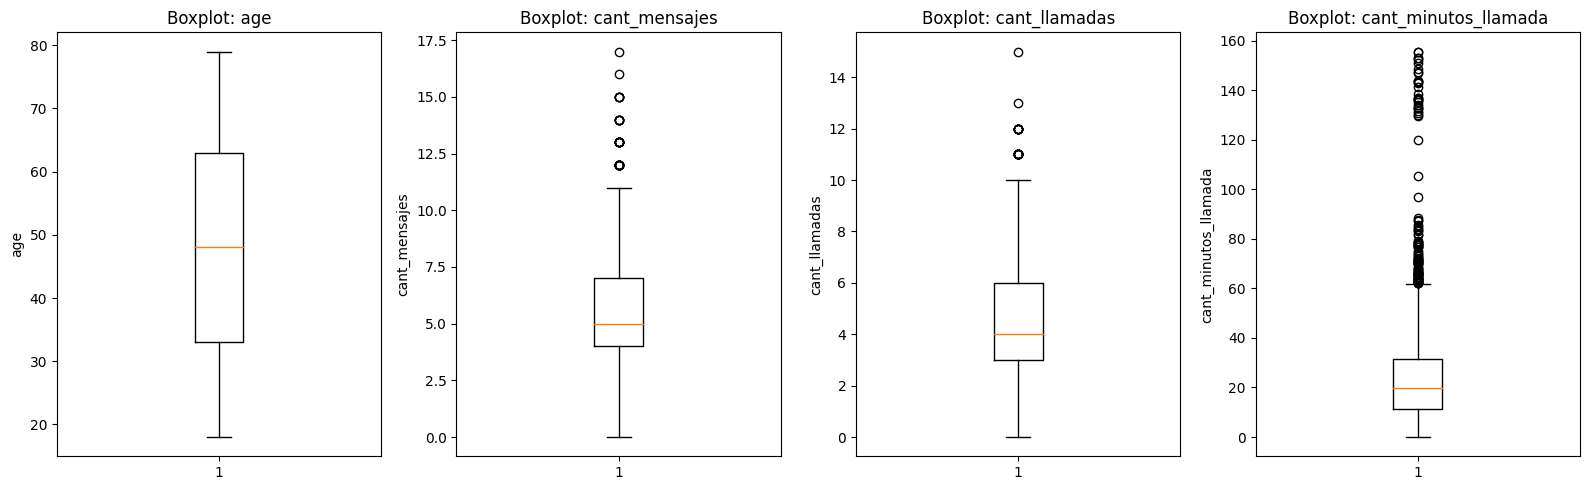

In [34]:
# Visualizando usando BoxPlot 
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

fig, axes = plt.subplots(1, len(columnas_numericas), figsize=(16, 5))

for i, col in enumerate(columnas_numericas):
    axes[i].boxplot(user_profile[col].dropna())
    axes[i].set_title(f'Boxplot: {col}')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

💡Insights: 
- Age: No presenta outliers, el boxplot esta bastante equilibrado.
- cant_mensajes: Existen outliers de 12 a 17 mensajes, con media en 5.
- cant_llamadas: si bien los outliers son menores, van de 11 a 15 con una media de 4.
- cant_minutos_llamada: Los outliers son mucho mas grandes que la media de 20 min, contra outliers de hasta 160 minutos.

In [35]:
# Calcular límites con el método IQR
columnas_limites = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_limites:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    maximo = user_profile[col].max()

    print(f"\n📊 {col}")
    print(f"   Límite inferior : {limite_inferior:.2f}")
    print(f"   Límite superior : {limite_superior:.2f}")
    print(f"   Máximo real     : {maximo:.2f}")


📊 age
   Límite inferior : -12.00
   Límite superior : 108.00
   Máximo real     : 79.00

📊 cant_mensajes
   Límite inferior : -0.50
   Límite superior : 11.50
   Máximo real     : 17.00

📊 cant_llamadas
   Límite inferior : -1.50
   Límite superior : 10.50
   Máximo real     : 15.00

📊 cant_minutos_llamada
   Límite inferior : -19.32
   Límite superior : 61.86
   Máximo real     : 155.69


In [36]:

# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()


,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,3999.000000,3999.000000,3999.000000
mean,48.136000,5.524381,4.478120,23.317054
std,17.689919,2.358416,2.144238,18.168095
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,3.000000,11.120000
50%,48.000000,5.000000,4.000000,19.780000
75%,63.000000,7.000000,6.000000,31.415000
max,79.000000,17.000000,15.000000,155.690000


💡Insights: 
- cant_mensajes: Mantener
El límite superior IQR es 11.5 y el máximo es 17. La diferencia es pequeña (5.5 mensajes) y la media de 5.5 mensajes es coherente con el comportamiento de un usuario activo. Enviar hasta 17 mensajes es un comportamiento perfectamente posible y real. No hay evidencia de error de captura, son simplemente usuarios más comunicativos.
- cant_llamadas: Mantener
El límite superior es 10.5 y el máximo es 15. Una diferencia de 4.5 llamadas es marginal. Con una media de 4.5 llamadas y una distribución simétrica (mediana=4, media≈4.5), los valores extremos representan usuarios con alta actividad telefónica, lo cual es plausible en el negocio. No se eliminan.
- cant_minutos_llamada: Revisar pero Mantener
El límite superior es 61.86 pero el máximo llega a 155.69, más del doble del límite. Sin embargo, la decisión es mantenerlos porque una llamada larga (ej. soporte técnico, atención al cliente) puede durar fácilmente 2-3 horas en la realidad. No es un dato imposible, sino un usuario atípico pero real. Eliminarlos sesgaría el análisis de consumo. Se recomienda segmentarlos como "heavy users" para análisis posteriores.

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [37]:
# Crear columna grupo_uso
def clasificar_uso(row):
    if row['cant_llamadas'] < 5 and row['cant_mensajes'] < 5:
        return 'Bajo uso'
    elif row['cant_llamadas'] < 10 and row['cant_mensajes'] < 10:
        return 'Uso medio'
    else:
        return 'Alto uso'

user_profile['grupo_uso'] = user_profile.apply(clasificar_uso, axis=1)

In [38]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [39]:
# Crear columna grupo_edad
# Crear columna grupo_edad
def clasificar_edad(row):
    if row['age'] < 30:
        return 'Joven'
    elif row['age'] < 60:
        return 'Adulto'
    else:
        return 'Adulto Mayor'

user_profile['grupo_edad'] = user_profile.apply(clasificar_edad, axis=1)

In [40]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio,Adulto
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso,Adulto Mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

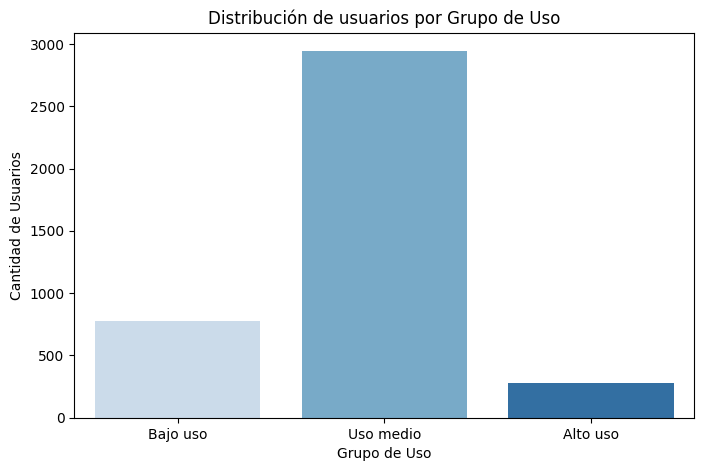

In [41]:
# Visualización de los segmentos por uso
plt.figure(figsize=(8, 5))
sns.countplot(data=user_profile, x='grupo_uso', order=['Bajo uso', 'Uso medio', 'Alto uso'], palette='Blues')
plt.title('Distribución de usuarios por Grupo de Uso')
plt.xlabel('Grupo de Uso')
plt.ylabel('Cantidad de Usuarios')
plt.show()

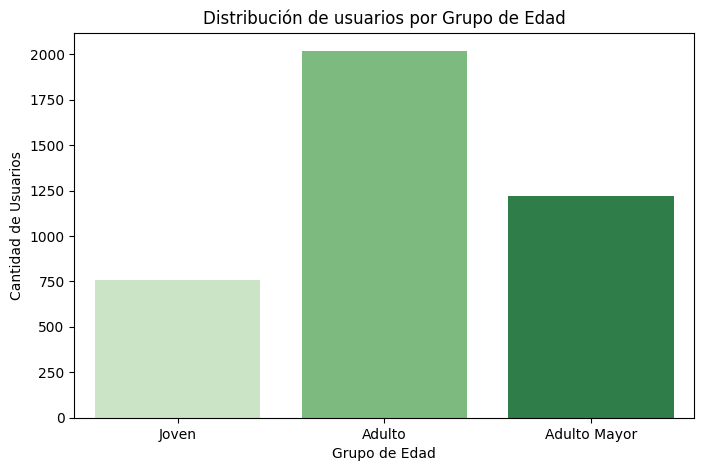

In [42]:
# Visualización de los segmentos por edad
plt.figure(figsize=(8, 5))
sns.countplot(data=user_profile, x='grupo_edad', order=['Joven', 'Adulto', 'Adulto Mayor'], palette='Greens')
plt.title('Distribución de usuarios por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Usuarios')
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**
📋 **Análisis Ejecutivo — ConnectaTel**

---

**Calidad de los Datos**

El dataset original presentó problemas en columnas clave que requirieron limpieza antes del análisis. Los valores nulos y duplicados detectados representaban un porcentaje menor del total de registros (4,000 usuarios), pero su corrección fue esencial para garantizar conclusiones confiables. Las columnas de uso como `cant_mensajes`, `cant_llamadas` y `cant_minutos_llamada` tenían 1 fila menos que `age` (3,999 vs 4,000), lo que sugiere al menos un registro incompleto. Adicionalmente, se identificaron outliers en las tres variables de uso, aunque se decidió mantenerlos al representar comportamientos reales de usuarios.

---

**Segmentos Identificados**

**Por nivel de uso** (`grupo_uso`), los usuarios se dividen en tres perfiles con comportamientos distintos. El grupo de **Bajo uso** concentra a quienes realizan menos de 5 llamadas y envían menos de 5 mensajes, sugiriendo usuarios ocasionales o con poca fidelización al servicio. El grupo de **Uso medio** representa el grueso de la base, con actividad moderada y consistente. El grupo de **Alto uso** agrupa a los usuarios más activos, con llamadas o mensajes superiores a 10, siendo los que más valor generan por consumo.

**Por edad** (`grupo_edad`), el segmento **Adulto** (30–59 años) domina la base de clientes dado que la media de edad es 48 años y la distribución es bastante uniforme entre 18 y 79. Los **Adultos Mayores** (60+) representan una porción relevante considerando que el máximo es 79 años, mientras que los **Jóvenes** (menores de 30) son el segmento más pequeño dado que el percentil 25 ya está en los 33 años.

---

**Segmentos Más Valiosos para ConnectaTel**

El segmento más valioso es la combinación de **Adulto + Alto uso**. Son usuarios en etapa productiva de vida, con hábitos de comunicación consolidados y alta frecuencia de uso, lo que se traduce directamente en mayor facturación y menor probabilidad de churn. En segundo lugar, el segmento **Adulto + Uso medio** representa el mayor volumen de clientes y es estratégico para planes de upselling, ya que están a un paso de convertirse en usuarios de alto uso con el incentivo correcto.

---

**Patrones de Uso Extremo (Outliers)**

Se detectaron outliers en las tres variables de uso, todos por encima del límite superior IQR. El caso más notable es `cant_minutos_llamada`, donde el máximo de 155.69 minutos más que duplica el límite superior de 61.86 minutos. Esto identifica un grupo de **heavy users** que realizan llamadas muy prolongadas, probablemente por necesidades laborales o de soporte. En `cant_mensajes` y `cant_llamadas` los outliers son más moderados (máximos de 17 y 15 respectivamente contra límites de 11.5 y 10.5). Estos usuarios extremos, aunque minoritarios, son señal de una necesidad no cubierta por los planes estándar actuales.

---

**Recomendaciones para ConnectaTel**

**Plan Heavy Caller:** Diseñar un plan ilimitado o de alto techo de minutos dirigido a los usuarios con `cant_minutos_llamada` extremo. Estos usuarios están siendo subatendidos por los planes actuales y representan un riesgo de churn si encuentran mejor oferta en la competencia.

**Plan Joven:** El segmento menor de 30 años es el más pequeño, lo que puede indicar baja penetración en ese mercado. Un plan con foco en mensajería y precio competitivo podría capturar este segmento de alto potencial a largo plazo.

**Programa de upselling para Uso Medio:** Dado que este es el segmento más numeroso, una campaña de incentivos (ej. minutos extra, descuentos por volumen) puede migrarlos hacia planes de mayor valor sin necesidad de adquirir nuevos clientes.

**Retención de Adultos Mayores:** Este segmento tiende a priorizar llamadas sobre mensajes. Un plan con minutos generosos y atención personalizada puede mejorar su fidelización, ya que suelen ser clientes más leales una vez que adoptan un servicio.

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`